# **Data Cleaning and Transformation**

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd

titanic_data = sns.load_dataset('titanic')

#check  first lines of the data
print(titanic_data.head(100))



    survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0          0       3    male  22.0      1      0   7.2500        S   Third   
1          1       1  female  38.0      1      0  71.2833        C   First   
2          1       3  female  26.0      0      0   7.9250        S   Third   
3          1       1  female  35.0      1      0  53.1000        S   First   
4          0       3    male  35.0      0      0   8.0500        S   Third   
..       ...     ...     ...   ...    ...    ...      ...      ...     ...   
95         0       3    male   NaN      0      0   8.0500        S   Third   
96         0       1    male  71.0      0      0  34.6542        C   First   
97         1       1    male  23.0      0      1  63.3583        C   First   
98         1       2  female  34.0      0      1  23.0000        S  Second   
99         0       2    male  34.0      1      0  26.0000        S  Second   

      who  adult_male deck  embark_town alive  alone  
0     ma

**(1) identify missing data in the dataset using the isnull() function in Pandas**

In [ ]:
#check for the missing values using null function
missing_data = titanic_data.isnull()
print(missing_data)

     survived  pclass    sex    age  sibsp  parch   fare  embarked  class  \
0       False   False  False  False  False  False  False     False  False   
1       False   False  False  False  False  False  False     False  False   
2       False   False  False  False  False  False  False     False  False   
3       False   False  False  False  False  False  False     False  False   
4       False   False  False  False  False  False  False     False  False   
..        ...     ...    ...    ...    ...    ...    ...       ...    ...   
886     False   False  False  False  False  False  False     False  False   
887     False   False  False  False  False  False  False     False  False   
888     False   False  False   True  False  False  False     False  False   
889     False   False  False  False  False  False  False     False  False   
890     False   False  False  False  False  False  False     False  False   

       who  adult_male   deck  embark_town  alive  alone  
0    False      

The boolean value True indicate missing values in the data

**(2) Using appropriate strategy to handle the missing data**

In [ ]:

# Impute missing age values with the mean age
mean_age = titanic_data['age'].mean()
titanic_data['age'].fillna(mean_age, inplace=True)


In [ ]:
# Check the frequency of embarked ports
most_frequent_port = titanic_data['embarked'].mode()[0]

# Fill missing embarked values with the most frequent port
titanic_data['embarked'].fillna(most_frequent_port, inplace=True)

In [ ]:
# Drop rows with missing values in the 'deck' column
titanic_data.dropna(subset=['deck'], inplace=True)

In [ ]:
# view the data
missing_data = titanic_data.isnull()
print(missing_data)

     survived  pclass    sex    age  sibsp  parch   fare  embarked  class  \
1       False   False  False  False  False  False  False     False  False   
3       False   False  False  False  False  False  False     False  False   
6       False   False  False  False  False  False  False     False  False   
10      False   False  False  False  False  False  False     False  False   
11      False   False  False  False  False  False  False     False  False   
..        ...     ...    ...    ...    ...    ...    ...       ...    ...   
871     False   False  False  False  False  False  False     False  False   
872     False   False  False  False  False  False  False     False  False   
879     False   False  False  False  False  False  False     False  False   
887     False   False  False  False  False  False  False     False  False   
889     False   False  False  False  False  False  False     False  False   

       who  adult_male   deck  embark_town  alive  alone  
1    False      

All the missing values are taken care of sinve all the boolean values are false, this indicate that there is no missing value  or error

**(3) scaling and normalization of data**

In [ ]:

# Log scale transformation for 'fare' column
titanic_data['fare_log'] = np.log1p(titanic_data['fare'])


In [ ]:
# Min-max scaling for 'age' column
titanic_data['age_scaled'] = (titanic_data['age'] - titanic_data['age'].min()) / (titanic_data['age'].max() - titanic_data['age'].min())

In [ ]:
# Z-score normalization for 'sibsp' column
titanic_data['sibsp_normalized'] = (titanic_data['sibsp'] - titanic_data['sibsp'].mean()) / titanic_data['sibsp'].std()

In [ ]:
#check  first lines of the data
print(titanic_data.head(100))

     survived  pclass     sex   age  sibsp  parch      fare embarked  class  \
1           1       1  female  38.0      1      0   71.2833        C  First   
3           1       1  female  35.0      1      0   53.1000        S  First   
6           0       1    male  54.0      0      0   51.8625        S  First   
10          1       3  female   4.0      1      1   16.7000        S  Third   
11          1       1  female  58.0      0      0   26.5500        S  First   
..        ...     ...     ...   ...    ...    ...       ...      ...    ...   
438         0       1    male  64.0      1      4  263.0000        S  First   
445         1       1    male   4.0      0      2   81.8583        S  First   
449         1       1    male  52.0      0      0   30.5000        S  First   
452         0       1    male  30.0      0      0   27.7500        C  First   
453         1       1    male  49.0      1      0   89.1042        C  First   

       who  adult_male deck  embark_town alive  alo

**(4)  feature engineering**

In [ ]:
# Create a new column 'Family_Size' by adding 'SibSp' and 'Parch' columns
titanic_data['Family_Size'] = titanic_data['sibsp'] + titanic_data['parch']

In [ ]:
#check  first lines of the data
print(titanic_data.head(100))

     survived  pclass     sex   age  sibsp  parch      fare embarked  class  \
1           1       1  female  38.0      1      0   71.2833        C  First   
3           1       1  female  35.0      1      0   53.1000        S  First   
6           0       1    male  54.0      0      0   51.8625        S  First   
10          1       3  female   4.0      1      1   16.7000        S  Third   
11          1       1  female  58.0      0      0   26.5500        S  First   
..        ...     ...     ...   ...    ...    ...       ...      ...    ...   
438         0       1    male  64.0      1      4  263.0000        S  First   
445         1       1    male   4.0      0      2   81.8583        S  First   
449         1       1    male  52.0      0      0   30.5000        S  First   
452         0       1    male  30.0      0      0   27.7500        C  First   
453         1       1    male  49.0      1      0   89.1042        C  First   

       who  adult_male deck  embark_town alive  alo

# **Data Visualization**

**(1) histogram of the age distribution of passengers.**

<ipython-input-2-8ca9a39da205>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=titanic_data, x='age', bins=20, palette='Set3')


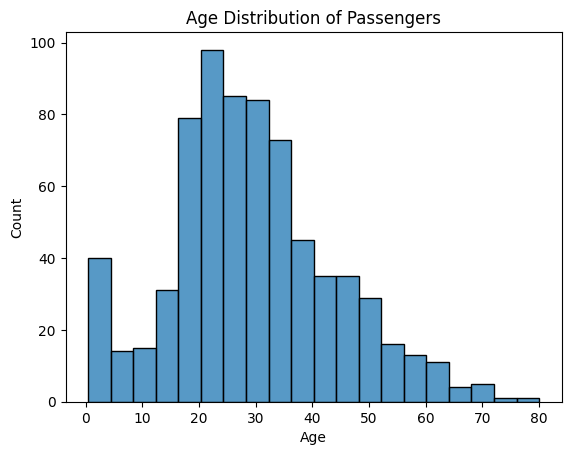

In [2]:

import matplotlib.pyplot as plt


# Plot histogram of age distribution with different colors for each bar
sns.histplot(data=titanic_data, x='age', bins=20, palette='Set3')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()




**(2)  Using a box plot, compare the fares paid by passengers who survived and who did not**

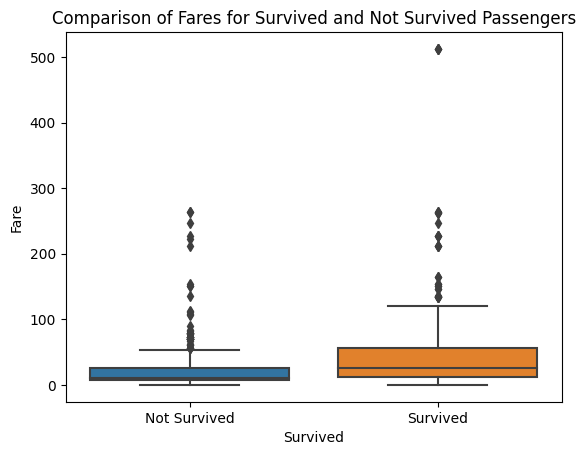

In [3]:

# Create a box plot to compare fares for passengers who survived and did not survive
sns.boxplot(x='survived', y='fare', data=titanic_data)
plt.title('Comparison of Fares for Survived and Not Survived Passengers')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()


**(3) heatmap to visualize the correlation among different numeric variables in the dataset**

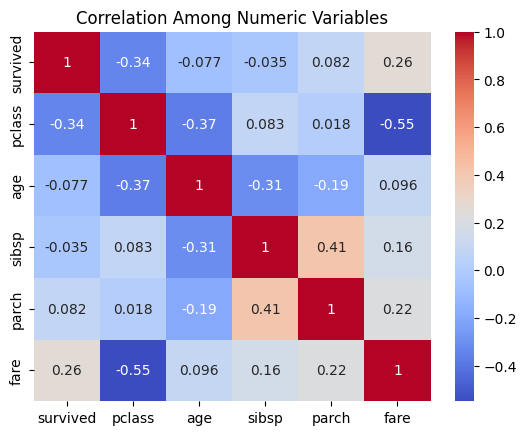

In [4]:
# Select numeric variables for correlation analysis
numeric_variables = titanic_data.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
correlation_matrix = numeric_variables.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Among Numeric Variables')
plt.show()


**(4) pairplot to observe the pairwise relationship between the different classes of the 'survived' column**

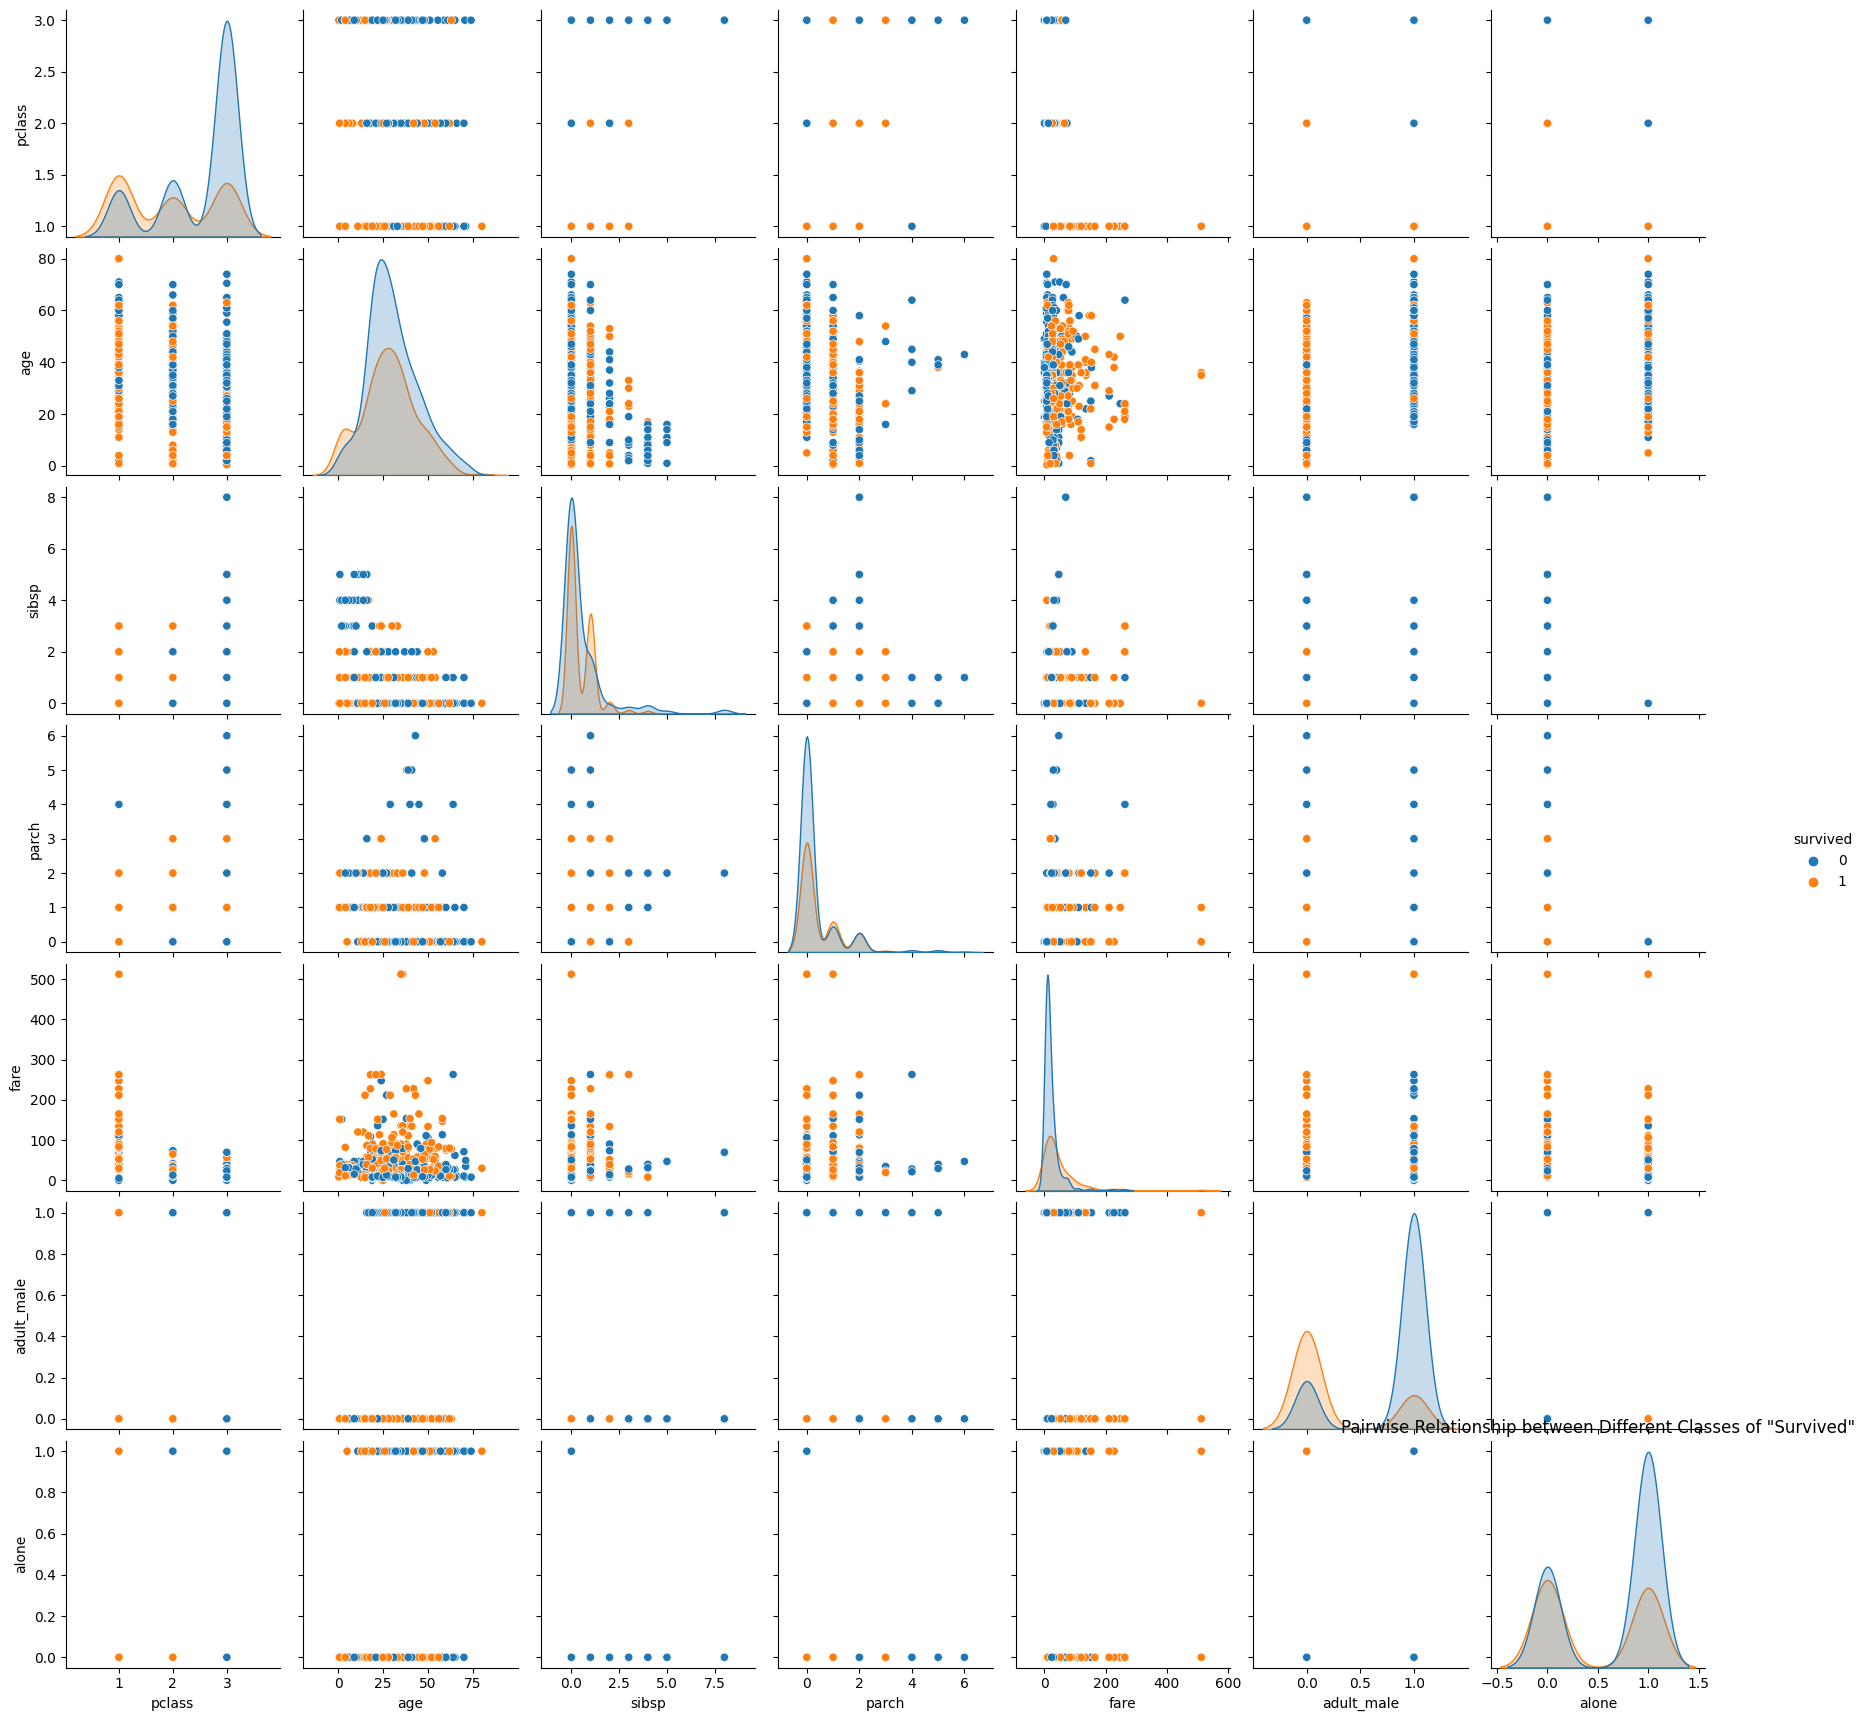

In [5]:
# Create a pair plot to observe the pairwise relationship between different classes of 'survived'
sns.pairplot(titanic_data, hue='survived')
plt.title('Pairwise Relationship between Different Classes of "Survived"')
plt.show()
